In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import pickle


In [152]:
df = pd.read_csv('https://raw.githubusercontent.com/Govind155/Web-Phishing-Detection-/main/dataset.csv')

In [153]:
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,NaN,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,NaN,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


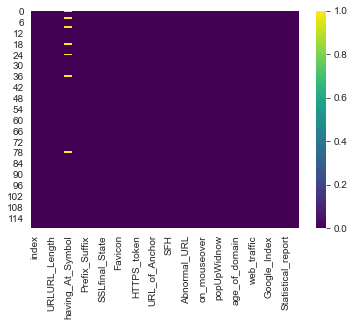

In [154]:
sns.heatmap(df[0:120].isnull(), cmap= 'viridis')
plt.savefig('heatmap.png')

In [155]:
df.describe()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,10959.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.703440,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.710787,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
print(df.corr()['Result'].sort_values())

Domain_registeration_length   -0.225789
Shortining_Service            -0.067966
Abnormal_URL                  -0.060488
HTTPS_token                   -0.039854
double_slash_redirecting      -0.038608
Redirect                      -0.020113
Iframe                        -0.003394
Favicon                       -0.000280
popUpWidnow                    0.000086
index                          0.000978
RightClick                     0.012653
Submitting_to_email            0.018249
Links_pointing_to_page         0.032574
port                           0.036419
on_mouseover                   0.041838
having_At_Symbol               0.051330
URLURL_Length                  0.057430
DNSRecord                      0.075718
Statistical_report             0.079857
having_IPhaving_IP_Address     0.094160
Page_Rank                      0.104645
age_of_domain                  0.121496
Google_Index                   0.128950
SFH                            0.221419
Links_in_tags                  0.248229


In [157]:
# Remove features having correlation coeff. between +/- 0.03
df.drop(['Favicon','Iframe','Redirect',
                'popUpWidnow','RightClick','Submitting_to_email'],axis=1,inplace=True)
print(len(df.columns))

26


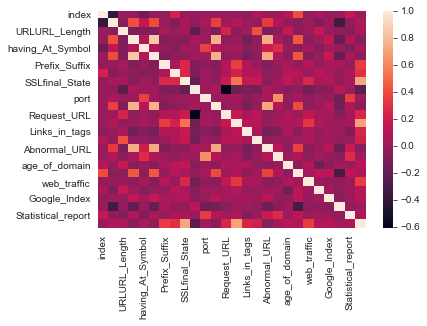

In [158]:
sns.heatmap(df.corr())
plt.savefig('corr.png')

In [159]:
l = [1,-1]
length = len(df)
# df.head()
for i in range(length):
  if(df['having_At_Symbol'].isnull().sum()):
    rand = random.randint(0,1)
    df['having_At_Symbol'][i] = l[rand]
  
df.head()

<ipython-input-159-31b8a8fc1e5f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['having_At_Symbol'][i] = l[rand]


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1.0,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,-1.0,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1.0,1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,-1.0,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1.0,1,-1,1,1,-1,...,1,-1,-1,-1,0,-1,1,1,1,1


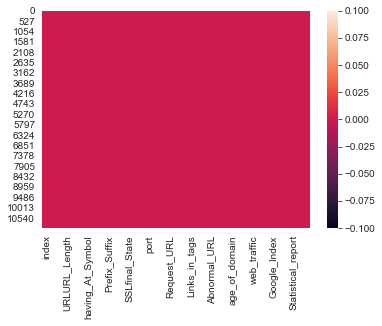

In [160]:
# print(df['having_At_Symbol'])
sns.heatmap(df.isnull())
plt.savefig('clean_heatmap.png')

<AxesSubplot:xlabel='having_At_Symbol', ylabel='count'>

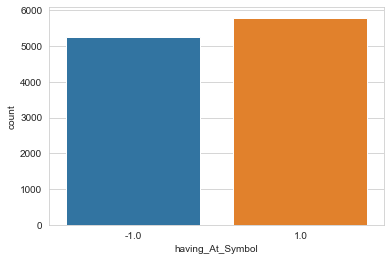

In [161]:
sns.set_style('whitegrid')
sns.countplot(x='having_At_Symbol',data=df)

<AxesSubplot:xlabel='having_IPhaving_IP_Address', ylabel='count'>

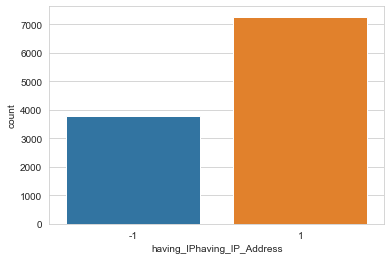

In [162]:
sns.countplot(x='having_IPhaving_IP_Address',data=df)

<AxesSubplot:xlabel='web_traffic', ylabel='count'>

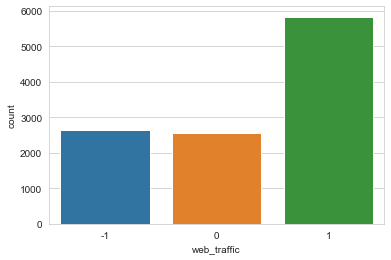

In [163]:
sns.countplot(x='web_traffic', data=df)

<AxesSubplot:xlabel='Result', ylabel='count'>

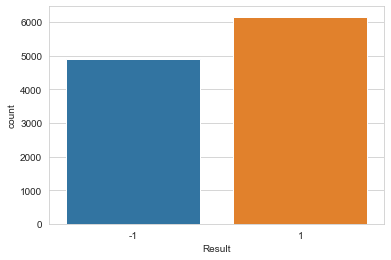

In [164]:
sns.countplot(x='Result', data=df)

<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='count'>

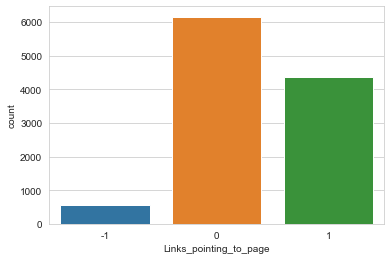

In [165]:
sns.countplot(x='Links_pointing_to_page', data=df)

<AxesSubplot:xlabel='Result', ylabel='count'>

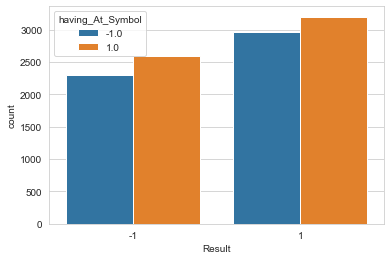

In [166]:
sns.countplot(x='Result', hue='having_At_Symbol', data=df)

c:\users\om\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Result', ylabel='Density'>

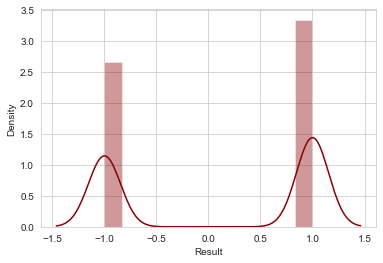

In [167]:
sns.distplot(df['Result'], color='darkred')

c:\users\om\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Links_pointing_to_page', ylabel='Density'>

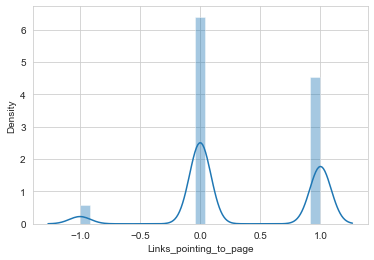

In [168]:
sns.distplot(df['Links_pointing_to_page'])

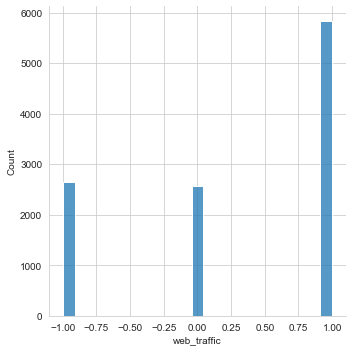

In [169]:
sns.displot(df['web_traffic'])

In [170]:
a=len(df[df.Result==0])
b=len(df[df.Result==-1])
c=len(df[df.Result==1])

In [171]:
print("Count of Legitimate Websites = ", b)
print("Count of Suspicious Websites = ", a)
print("Count of Phishy Websites = ", c)

Count of Legitimate Websites =  4898
Count of Suspicious Websites =  0
Count of Phishy Websites =  6157


In [172]:
df.drop(['index'],axis=1,inplace=True)
print(len(df.columns))

25


In [173]:
df.corr()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IPhaving_IP_Address,1.000000,-0.052411,0.403461,-0.019743,0.397389,-0.005257,-0.080745,0.071414,-0.022739,0.060979,...,0.336549,0.084059,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,-0.052411,1.000000,-0.097881,-0.011944,-0.081247,0.055247,0.003997,0.048754,-0.221892,0.000323,...,-0.106761,-0.045103,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,0.403461,-0.097881,1.000000,-0.004005,0.842796,-0.080471,-0.041916,-0.061426,0.060923,0.002201,...,0.739290,0.062383,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.019743,-0.011944,-0.004005,1.000000,-0.002867,-0.020060,0.005890,-0.005238,-0.009507,0.043311,...,0.020171,0.024596,0.026367,0.029677,-0.010939,0.008988,0.002261,-0.010325,-0.001521,-0.009411
double_slash_redirecting,0.397389,-0.081247,0.842796,-0.002867,1.000000,-0.085590,-0.043079,-0.036200,0.047464,0.025060,...,0.723724,0.086635,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.005257,0.055247,-0.080471,-0.020060,-0.085590,1.000000,0.087891,0.261391,-0.096799,-0.022546,...,-0.077620,0.012578,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,-0.080745,0.003997,-0.041916,0.005890,-0.043079,0.087891,1.000000,0.267649,-0.082839,0.004863,...,-0.034908,-0.018082,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,0.071414,0.048754,-0.061426,-0.005238,-0.036200,0.261391,0.267649,1.000000,-0.193622,0.027473,...,-0.046245,0.023586,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.022739,-0.221892,0.060923,-0.009507,0.047464,-0.096799,-0.082839,-0.193622,1.000000,0.022478,...,0.058109,0.023784,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789
port,0.060979,0.000323,0.002201,0.043311,0.025060,-0.022546,0.004863,0.027473,0.022478,1.000000,...,0.054126,0.623298,0.008459,0.054849,-0.028543,0.017954,-0.005413,-0.139104,0.343987,0.036419


## Split the dataset

In [174]:
from sklearn.model_selection import train_test_split,cross_val_score

In [175]:
X= df.drop(columns='Result')
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,port,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1.0,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,-1.0,1,-1,0,1,-1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1.0,1,-1,-1,-1,-1,1,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,-1.0,1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1.0,1,-1,1,1,-1,1,...,-1,1,-1,-1,-1,0,-1,1,1,1


In [176]:
Y=df['Result']
Y=pd.DataFrame(Y)
Y.head()

,Result
0,-1
1,-1
2,-1
3,-1
4,1


In [177]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=10)

In [178]:
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 6633 samples.
Testing set has 4422 samples.


## Lets apply Random Forest Classifier and check its accuracy



In [179]:
from sklearn.ensemble import RandomForestClassifier


In [180]:
rfc=RandomForestClassifier()
model_4=rfc.fit(train_X,train_Y)

<ipython-input-180-749d4f1c8dd2>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4=rfc.fit(train_X,train_Y)


In [181]:
rfc_predict=model_4.predict(test_X)


In [182]:
print('The accuracy of Random Forest Classifier is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))


The accuracy of Random Forest Classifier is:  96.58525554047942


In [183]:
print(classification_report(rfc_predict,test_Y))


              precision    recall  f1-score   support

          -1       0.96      0.96      0.96      1909
           1       0.97      0.97      0.97      2513

    accuracy                           0.97      4422
   macro avg       0.96      0.97      0.97      4422
weighted avg       0.97      0.97      0.97      4422



In [187]:
saved_model=pickle.dumps(model_4)


In [188]:
modelfrom_pickle = pickle.loads(saved_model)

In [190]:
y_pred=modelfrom_pickle.predict(test_X)

In [191]:
print(accuracy_score(test_Y,y_pred))

0.9658525554047942


In [192]:
import joblib


In [193]:
joblib.dump(model_4,'pickle.pkl')

['pickle.pkl']

In [194]:
joblib.dump(X,'transform.pkl')

['transform.pkl']